In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-74.63591102829375 -48.52146751774109
-41.34774223666564 73.97465408918342
86.64363810323263 -126.77287706658525
67.11062326709782 64.58333948951866
89.89194266400307 -61.68846052534239
-21.300802104168554 36.07514365993026
18.08123756582863 -151.85404519444035
61.7054287736965 153.3921488366903
30.876424239154005 -12.907319198319811
-15.277197928418275 10.216553484775261
81.91912964063391 17.55691787787677
77.64491571060054 -68.70823961426139
-2.0928403255407346 28.49332181601224
71.812154880646 -28.20746379238065
-46.76094834341036 -121.11262214585098
70.50877509262588 -94.60388603474091
-81.58017746416841 143.37325315370265
52.03396531215395 167.45822264962226
1.3795544274964016 65.2744492640654
-57.241288935795325 127.21026627888835
-63.55768901824988 -35.969464049582314
-12.668326440634956 162.95141148166482
-44.73176460167727 -111.42475638562269
-80.6378265688214 155.73678144964765
-56.62741953831058 66.36107220692017
-22.81938042531428 12.19239516197257
-56.12619789168191 176.86

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | yeletskiy
City not found. Skipping...
Processing Record 5 of Set 1 | narsaq
Processing Record 6 of Set 1 | beira
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | talaya
Processing Record 9 of Set 1 | teguise
Processing Record 10 of Set 1 | namibe
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | kabare
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | thinadhoo
Processing Record 19 of Set 1 | mount gambier
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | kirakira
Processing Record 22 o

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,29.86,93,100,24.16,AR,2022-07-21 21:34:49
1,Mahebourg,-20.4081,57.7000,70.25,73,75,11.50,MU,2022-07-21 21:30:46
2,Tuktoyaktuk,69.4541,-133.0374,55.40,94,100,6.91,CA,2022-07-21 21:35:11
3,Narsaq,60.9167,-46.0500,61.02,78,13,6.64,GL,2022-07-21 21:35:11
4,Beira,-19.8436,34.8389,69.89,94,20,9.22,MZ,2022-07-21 21:35:11


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-07-21 21:34:49,-54.8000,-68.3000,29.86,93,100,24.16
1,Mahebourg,MU,2022-07-21 21:30:46,-20.4081,57.7000,70.25,73,75,11.50
2,Tuktoyaktuk,CA,2022-07-21 21:35:11,69.4541,-133.0374,55.40,94,100,6.91
3,Narsaq,GL,2022-07-21 21:35:11,60.9167,-46.0500,61.02,78,13,6.64
4,Beira,MZ,2022-07-21 21:35:11,-19.8436,34.8389,69.89,94,20,9.22


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

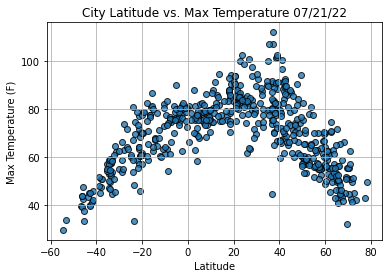

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

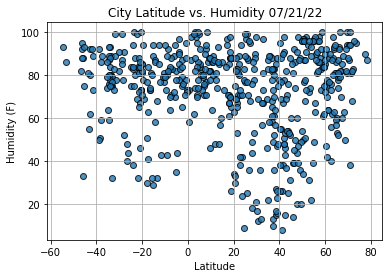

In [18]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

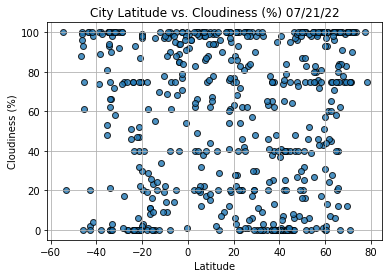

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

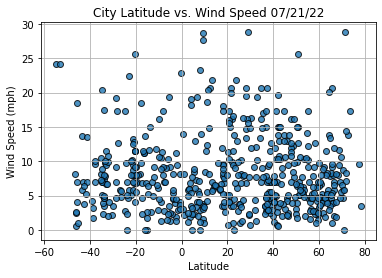

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()